In [2]:
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sn

In [3]:
data=pd.read_csv(r'C:\Users\deyar\OneDrive\Desktop\AgricultureCommodityForecast\notebooks\data\agricultuer.csv')

In [4]:
data.head()

,Unnamed: 0,commdity,date,price
0,0,Tomato Big(Nepali),2013-06-16,37.5
1,1,Tomato Small(Local),2013-06-16,29.0
2,2,Potato Red,2013-06-16,20.5
3,3,Potato White,2013-06-16,15.5
4,4,Onion Dry (Indian),2013-06-16,29.0


In [5]:
data.isnull().sum()

Unnamed: 0    0
commdity      0
date          0
price         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  197161 non-null  int64  
 1   commdity    197161 non-null  object 
 2   date        197161 non-null  object 
 3   price       197161 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.0+ MB


In [7]:
data['date']=pd.to_datetime(data['date'])

In [8]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
data.head()

,commdity,date,price
0,Tomato Big(Nepali),2013-06-16,37.5
1,Tomato Small(Local),2013-06-16,29.0
2,Potato Red,2013-06-16,20.5
3,Potato White,2013-06-16,15.5
4,Onion Dry (Indian),2013-06-16,29.0


In [10]:
Potato=data[data['commdity']=='Potato White']

In [11]:
data1=Potato.set_index('date')

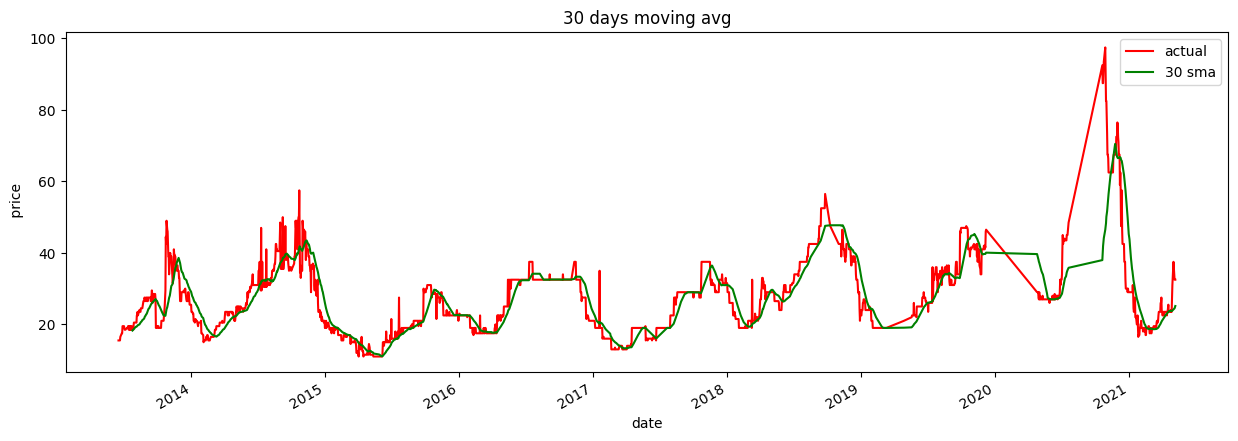

In [12]:
pl.figure(figsize=(15,5))
data1['price'].plot(c='r',label='actual')
data1['price'].rolling(30).mean().plot(c='g',label='30 sma')
pl.ylabel(' price')
pl.title('30 days moving avg')
pl.legend()
pl.show()

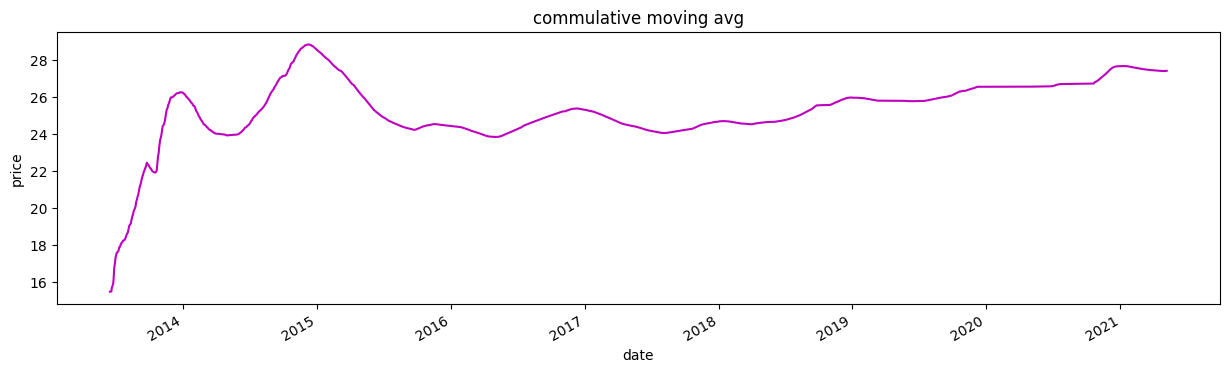

In [13]:
data1['price'].expanding().mean().plot(figsize=(15,4),c='m')
pl.ylabel('price')
pl.title('commulative moving avg')
pl.show()

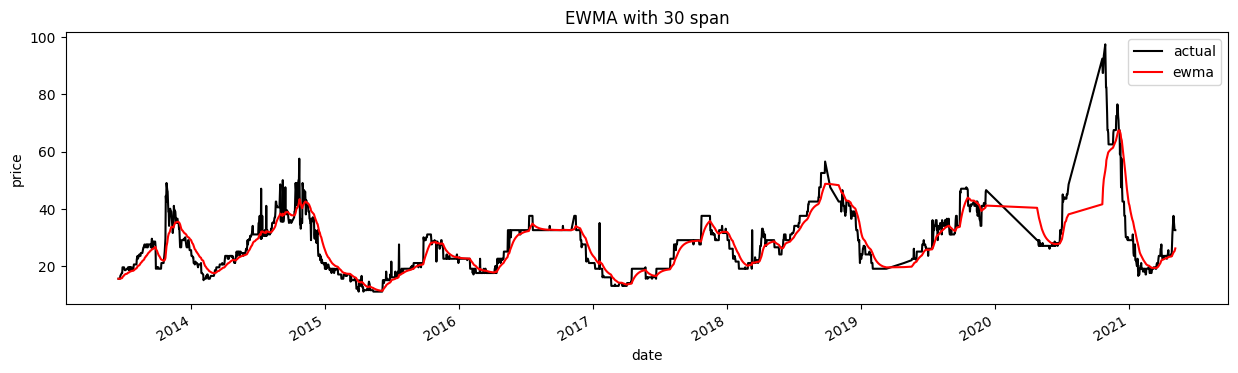

In [14]:
data1['price'].plot(figsize=(15,4),c='k',label='actual')
data1['price'].ewm(span=30,adjust=False).mean().plot(figsize=(15,4),c='r',label='ewma')
pl.ylabel('price')
pl.title('EWMA with 30 span')
pl.legend()
pl.show()

we calculate diff avg for smoothning data and to know the pattern of data.

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1500x400 with 0 Axes>

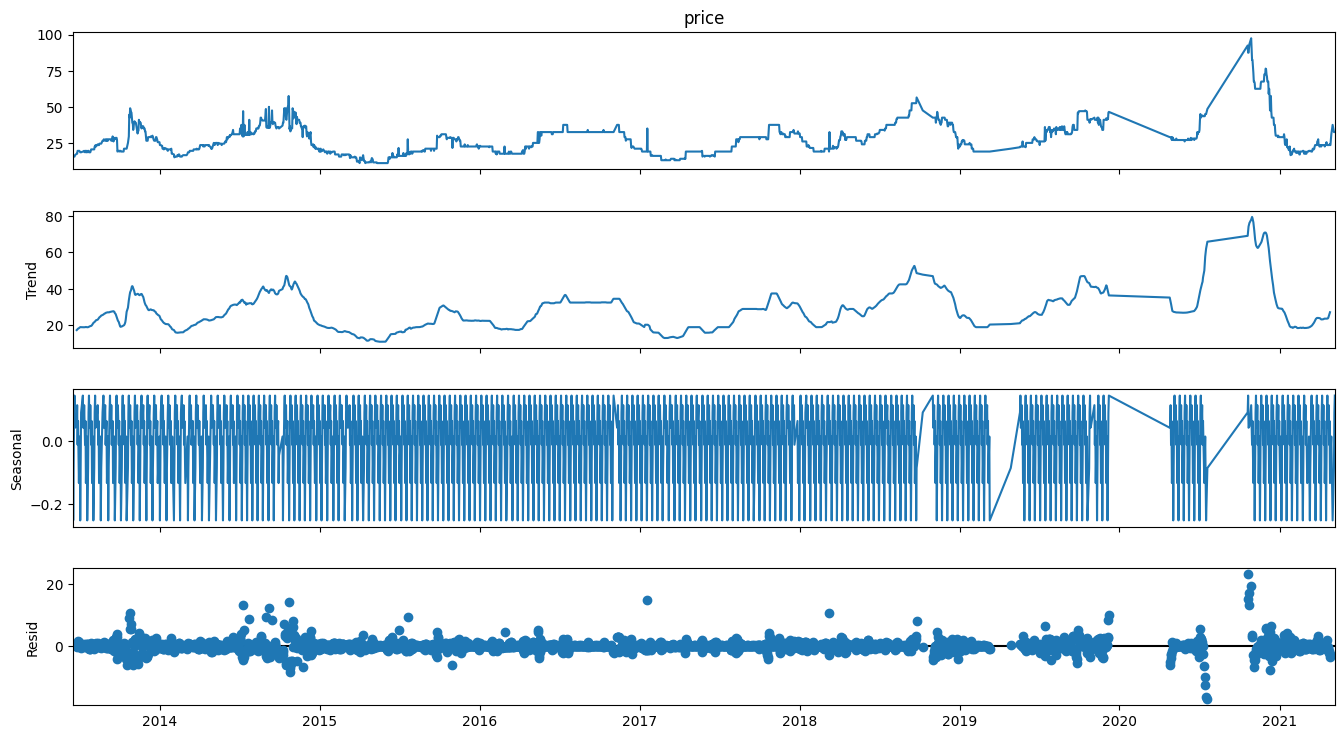

In [16]:
res=seasonal_decompose(data1['price'],period=12)
v=pl.figure(figsize=(15,4))
v=res.plot()
v.set_size_inches(15,8)

this are different  components of timeseries

we have to eliminate seasonality 

In [17]:
from statsmodels.tsa.stattools import adfuller

h0=data is not stationary (p>0.05)

h1=data is not stationary (p<0.05)

In [18]:
v=adfuller(data1['price'])[0:4]
if v[1]<=0.05:
    print('this is stationary')
else:
    print('this is not stationary')

this is stationary


In [19]:
pd.DataFrame(v,index=['stat_value','p_value','no_of_lags','no_of_data_points'],columns=['values'])

,values
stat_value,-3.675331
p_value,0.004474
no_of_lags,8.000000
no_of_data_points,2372.000000


id  data is non stationary then use differencing      .diff() code

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

by using this graph we assume ar and ma no for model

<Figure size 1500x600 with 0 Axes>

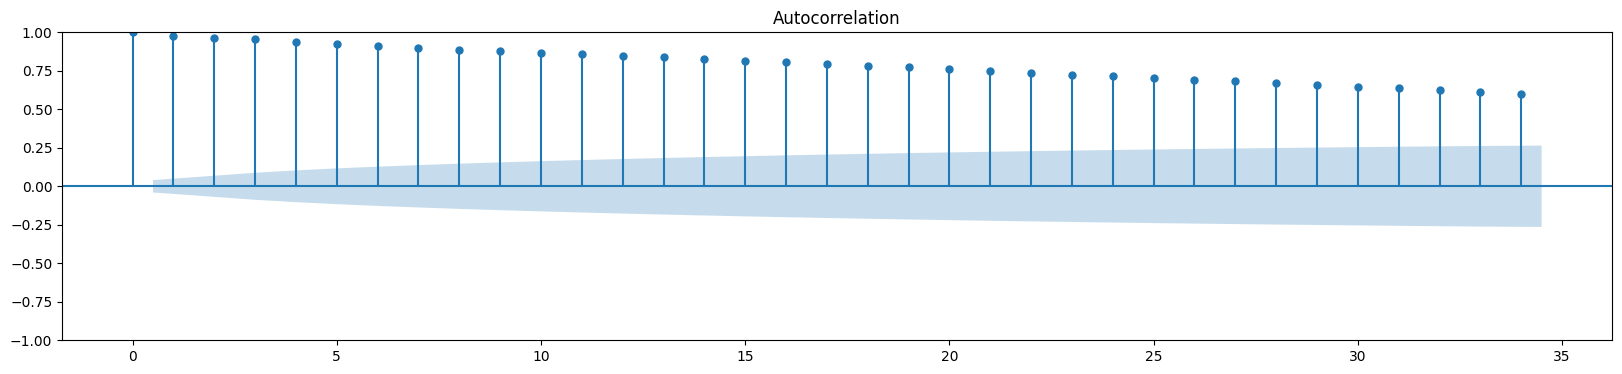

In [21]:
v=pl.figure(figsize=(15,6))
v=plot_acf(data1['price'])
v.set_size_inches(20,4)

<Figure size 1500x600 with 0 Axes>

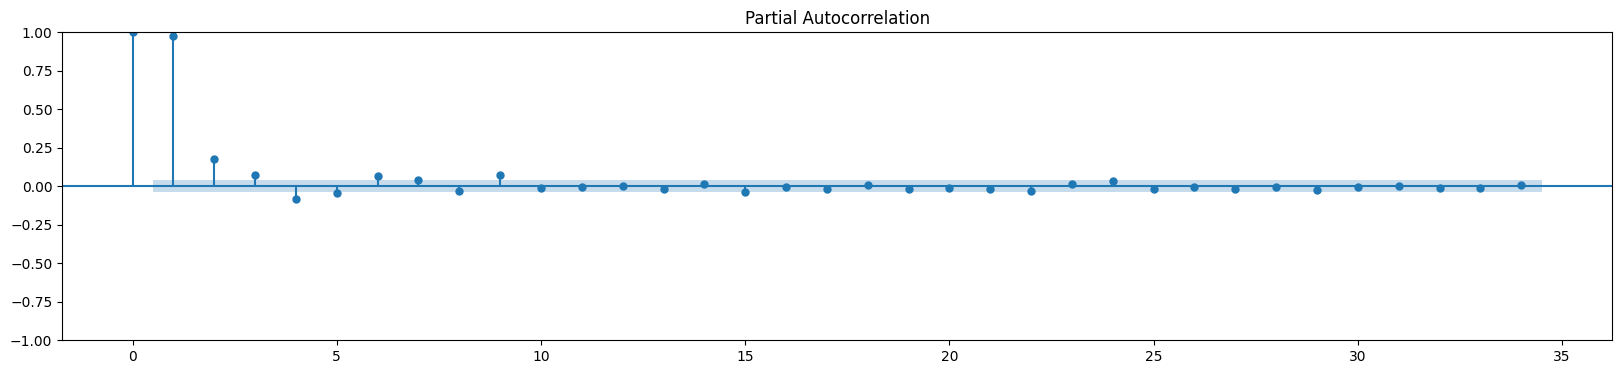

In [22]:
v=pl.figure(figsize=(15,6))
v=plot_pacf(data1['price'])
v.set_size_inches(20,4)

In [23]:
def st(x):
    pl.figure(figsize=(15,5))
    rollmean=x.rolling(30).mean()
    rollstd=x.rolling(30).std()
    pl.plot(x,label='orginal',c='k')
    pl.plot(rollmean,label='mean',c='r')
    pl.plot(rollstd,label='std',c='m')
    pl.ylabel('price')
    pl.xlabel('date')
    pl.title('date vs price')
    pl.legend()
    pl.show()
    print('result of adf test')
    v=adfuller(x)[0:4]
    g=pd.DataFrame(v,index=['stat_value','p_value','no_of_lags','no_of_data_points'],columns=['values'])
    print(g)
    if v[1]<=0.05:
      print('this is stationary')
    else:
      print('this is not stationary')

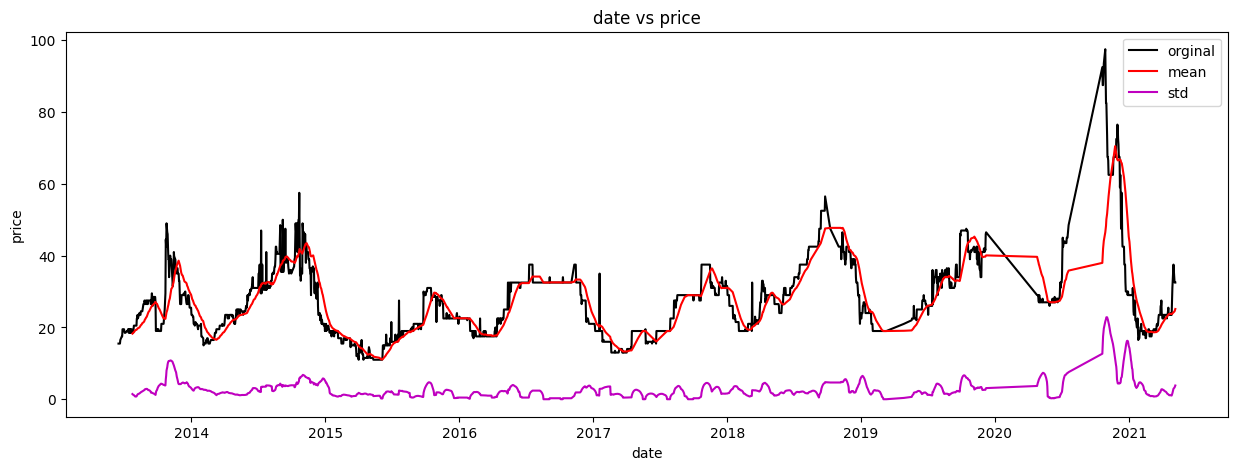

result of adf test
                        values
stat_value           -3.675331
p_value               0.004474
no_of_lags            8.000000
no_of_data_points  2372.000000
this is stationary


In [24]:
st(data1['price'])

In [25]:
import pmdarima as pm

In [26]:
data1.head()

,commdity,price
date,,
2013-06-16,Potato White,15.5
2013-06-17,Potato White,15.5
2013-06-18,Potato White,15.5
2013-06-19,Potato White,15.5
2013-06-20,Potato White,15.5


In [27]:
y=[s for s in data1['price'].values]

In [28]:
model=pm.arima.auto_arima(y, 
                      start_p=2, start_q=2,
                      max_p=5, max_d=2, max_q=5,
                      seasonal=False,   # No seasonality
                      stepwise=True,    # Use stepwise search
                      trace=True,       # Print the progress
                      error_action='ignore',  # Ignore models that fail
                      suppress_warnings=True, # Suppress warnings
                      maxiter=50)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10267.773, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10391.765, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10305.664, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10296.941, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10389.791, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10295.310, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10288.087, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10266.761, Time=1.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10281.559, Time=0.84 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=10266.879, Time=1.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10267.586, Time=1.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10267.359, Time=0.84 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10278.149, Time=0.61 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=10268.870, Time=1.56 sec
 ARIMA(3,1,2)(0,0,0

In [29]:
model = pm.auto_arima(
    y,
    X=None,  # Exogenous variables
    start_p=1,
    start_q=1,
    max_p=3,
    max_d=2,
    max_q=3,
    start_P=1,
    D=None,
    start_Q=1,
    max_P=2,
    max_D=1,
    max_Q=2,
    max_order=5,
    m=12,  # Season length for seasonal ARIMA
    seasonal=True,
    stationary=False,
    information_criterion='aic',
    alpha=0.05,
    test='kpss',
    seasonal_test='ocsb',
    stepwise=True,
    n_jobs=1,
    start_params=None,
    trend=None,
    method='lbfgs',
    maxiter=50,
    offset_test_args=None,
    seasonal_test_args=None,
    suppress_warnings=True,
    error_action='trace',
    trace=False,
    random=False,
    random_state=None,
    n_fits=10,
    return_valid_fits=False,
    out_of_sample_size=0,
    scoring='mse',
    scoring_args=None,
    with_intercept='auto',
    sarimax_kwargs=None)

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2381
Model:             SARIMAX(3, 1, 2)x(1, 0, [], 12)   Log Likelihood               -5125.266
Date:                             Fri, 24 May 2024   AIC                          10264.532
Time:                                     07:09:55   BIC                          10304.956
Sample:                                          0   HQIC                         10279.244
                                            - 2381                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5778      0.085     -6.804      0.000      -0.744      -0.411
ar.L2         -0.8155      0.069    -11.759      0.000      -0.951      -0.680
ar.L3         -0.0896      0.024     -3.704      0.000      -0.137      -0.042
ma.L1          0.3775      0.085      4.462      0.000       0.212       0.543
ma.L2          0.6751      0.066     10.230      0.000       0.546       0.804
ar.S.L12       0.0338      0.020      1.659      0.097      -0.006       0.074
sigma2         4.3451      0.025    176.058      0.000       4.297       4.393
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1026375.84
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             4.28
Prob(H) (two-sided):                  0.00   Kurtosis:                       104.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
model=ARIMA(y,order=(3,1,2)).fit()

In [33]:
pred=model.predict(start=0,end=len(y)-1)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(data1['price'].values,pred)

4.448217015830715

In [36]:
from statsmodels.graphics.tsaplots import plot_predict

<Figure size 1500x600 with 0 Axes>

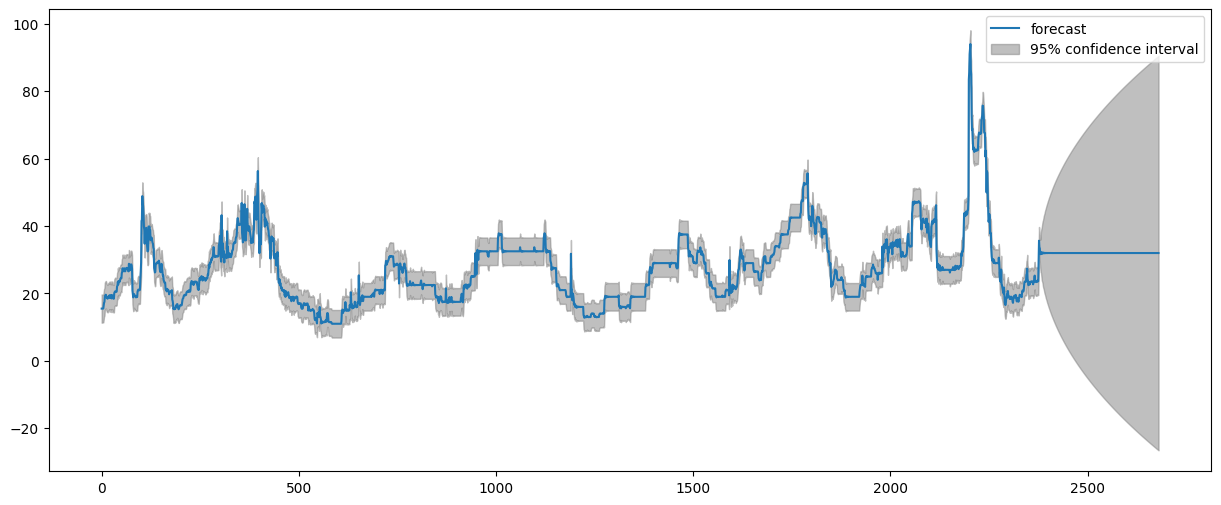

In [37]:

a=pl.figure(figsize=(15,6))
a=plot_predict(result=model,start=1,end=len(y)+300)
a.set_size_inches(15,6)
